<a href="https://colab.research.google.com/github/Vinay-Yadav01/Learning-ML/blob/main/2_Normal_Distribution_and_Z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classwork

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='height', ylabel='Count'>

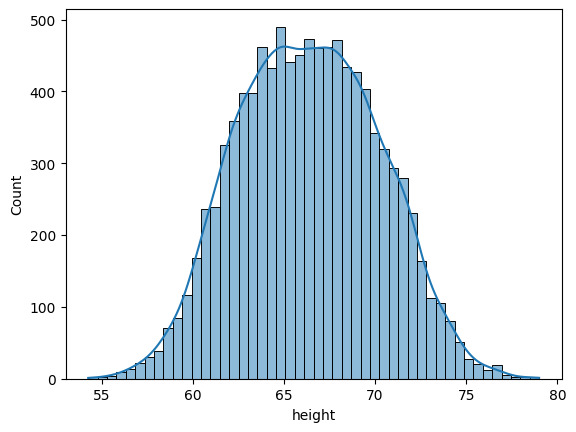

In [6]:
import seaborn as sn
sn.histplot(df.height, kde = True)

In [7]:
mean = df.height.mean()
mean

66.367559754866

In [8]:
std_dev = df.height.std()
std_dev

3.847528120795573

In [9]:
mean+3*std_dev

77.91014411725271

In [10]:
mean-3*std_dev

54.824975392479274

In [11]:
df  = df[(df.height<mean+3*std_dev) & (df.height>mean-3*std_dev)]
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [12]:
df.describe()

,height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


In [16]:
df['zscore'] = (df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202


In [20]:
df = df[(df.zscore<3) & (df.zscore>-3)]
df

,gender,height,zscore
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202
...,...,...,...
9995,Female,66.172652,-0.049851
9996,Female,67.067155,0.183365
9997,Female,63.867992,-0.650725
9998,Female,69.034243,0.696227


In [21]:
df.describe()

,height,zscore
count,9993.000000,9.993000e+03
mean,66.363856,1.888523e-15
std,3.835511,1.000000e+00
min,54.873728,-2.995723e+00
25%,63.505894,-7.451318e-01
50%,66.317755,-1.201937e-02
75%,69.169353,7.314532e-01
max,77.547186,2.915734e+00


# Homework

In [55]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [56]:
df = df.drop(['location', 'size', 'bath', 'bhk'], axis = 1) # Change ('location', 'size') to ['location', 'size']
df.head()

,total_sqft,price,price_per_sqft
0,1056.0,39.07,3699
1,2600.0,120.00,4615
2,1440.0,62.00,4305
3,1521.0,95.00,6245
4,1200.0,51.00,4250


In [57]:
df.describe()

,total_sqft,price,price_per_sqft
count,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,112.276178,7.920337e+03
std,1237.323445,149.175995,1.067272e+05
min,1.000000,8.000000,2.670000e+02
25%,1100.000000,50.000000,4.267000e+03
50%,1275.000000,71.850000,5.438000e+03
75%,1672.000000,120.000000,7.317000e+03
max,52272.000000,3600.000000,1.200000e+07


In [58]:
df = df[df< df.quantile(0.999)]
df = df[df> df.quantile(0.001)]
df.describe()

,total_sqft,price,price_per_sqft
count,13172.000000,13169.000000,13172.000000
mean,1531.860745,109.711561,6663.653735
std,882.781671,125.440883,4141.020700
min,340.000000,11.660000,1379.000000
25%,1100.000000,50.000000,4271.000000
50%,1275.000000,71.890000,5438.000000
75%,1670.000000,120.000000,7311.000000
max,11890.000000,1950.000000,50349.000000


In [59]:
mean = df.price_per_sqft.mean()
std_dev = df.price_per_sqft.std()

In [60]:
df = df[(df.price_per_sqft < mean + 4 * std_dev) & (df.price_per_sqft > mean - 4 * std_dev)]
df

,total_sqft,price,price_per_sqft
0,1056.0,39.07,3699.0
1,2600.0,120.00,4615.0
2,1440.0,62.00,4305.0
3,1521.0,95.00,6245.0
4,1200.0,51.00,4250.0
...,...,...,...
13195,3453.0,231.00,6689.0
13196,3600.0,400.00,11111.0
13197,1141.0,60.00,5258.0
13198,4689.0,488.00,10407.0


<Axes: xlabel='price_per_sqft', ylabel='Count'>

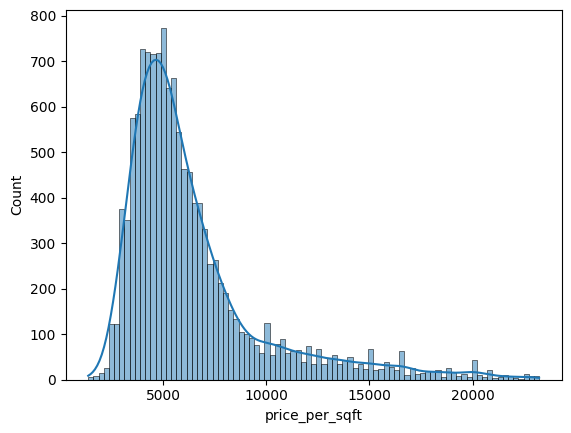

In [62]:
import seaborn as sn
sn.histplot(df.price_per_sqft, kde = True)

In [50]:
df['zscore'] = (df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()
df.head()

,total_sqft,price,price_per_sqft,zscore
0,1056.0,39.07,3699.0,-0.715923
1,2600.0,120.00,4615.0,-0.494722
2,1440.0,62.00,4305.0,-0.569583
3,1521.0,95.00,6245.0,-0.101099
4,1200.0,51.00,4250.0,-0.582864


In [44]:
df = df[(df.zscore<4) & (df.zscore>-4)]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

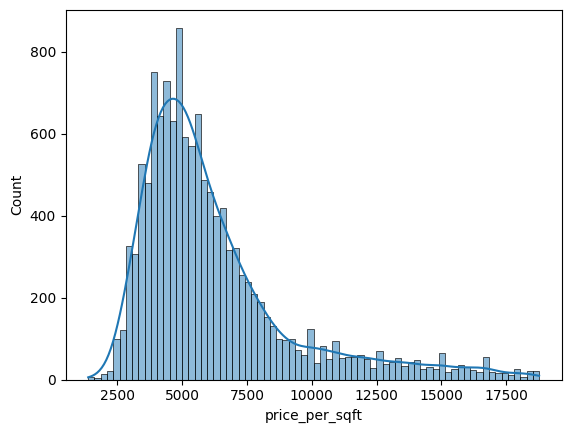

In [45]:
import seaborn as sn
sn.histplot(df.price_per_sqft, kde = True)